In [3]:
!pip install pillow

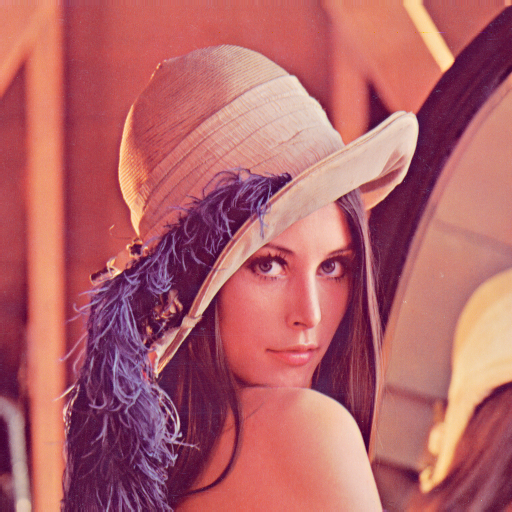

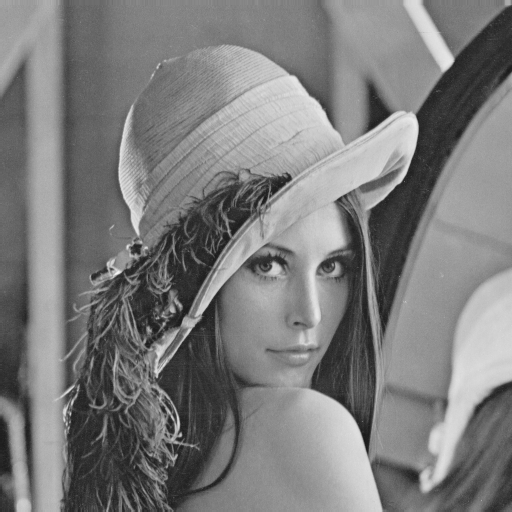

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

normal_image = Image.open("lenna_img.png")
display(normal_image)
image = Image.open("lenna_img.png").convert("L")
display(image)

In [65]:
print("Image Format : ", image.format)
print("Image Size : ", image.size)
print("Image Mode : ", image.mode)
print("Image Format : ", normal_image.format)
print("Image Size : ", normal_image.size)
print("Image Mode : ", normal_image.mode)

Image Format :  None
Image Size :  (512, 512)
Image Mode :  L
Image Format :  PNG
Image Size :  (512, 512)
Image Mode :  RGB


In [69]:
width , height = image.size
channels = len( image.getbands () ) 
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_grayed = width * height *1
print ( f" Image size (RGB): { image_size_grayed }")

 Image shape (RGB): (512 , 512 , 1)
 Image size (RGB): 262144


In [75]:
width , height = normal_image.size
channels = len( normal_image.getbands () ) 
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_colored = width * height *3
print ( f" Image size (RGB): { image_size_colored }")

 Image shape (RGB): (512 , 512 , 3)
 Image size (RGB): 786432


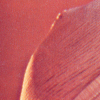

In [83]:
# Define the cropping box (left , upper , right , lower )
left = 100 
upper = 50 
right = 200 
lower = 150
# Crop the image
cropped_image = normal_image . crop (( left , upper , right ,
lower ) )
# Display the cropped image
display ( cropped_image )

Shape of the image array: (512, 512, 3)


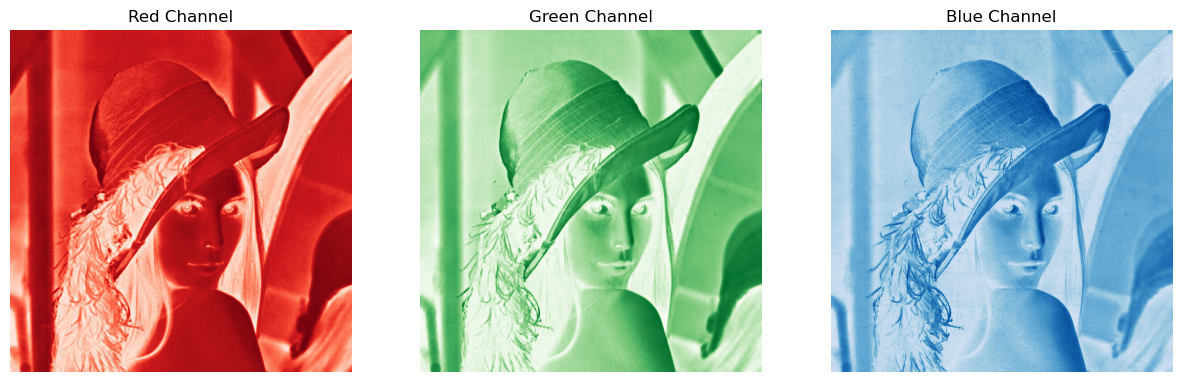

In [119]:

# Convert the Pillow image to a NumPy array
image_array_colored = np.array(normal_image)

# Display the shape of the NumPy array (height, width, channels)
print("Shape of the image array:", image_array_colored.shape)

# Extract individual color channels
red_channel = image_array_colored[:, :, 0]  # Red channel
green_channel = image_array_colored[:, :, 1]  # Green channel
blue_channel = image_array_colored[:, :, 2]  # Blue channel

# Plot each channel with corresponding colormap
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap="Reds")  # Red colormap
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel, cmap="Greens")  # Green colormap
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel, cmap="Blues")  # Blue colormap
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()

In [115]:
image_array = np . zeros ((100 , 100 , 3) , dtype = np . uint8 ) #
# Convert the NumPy array back to a Pillow Image object
image_from_array = Image . fromarray ( image_array )
# Display the image
image_from_array . show ()
# Optionally save the image to a file
image_from_array.save ("output_image.jpg")

In [29]:
image_array = np.array(image)
height,width = image_array.shape
data = image_array.reshape(height, width)
print(image_array)
print(height,width)
print(data)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
512 512
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


In [39]:
mean = np.mean(data, axis=0)
centered_data = data - mean

In [43]:
cov_matrix = np.cov(centered_data, rowvar=False)

In [47]:
#eigen values ad vectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
#sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

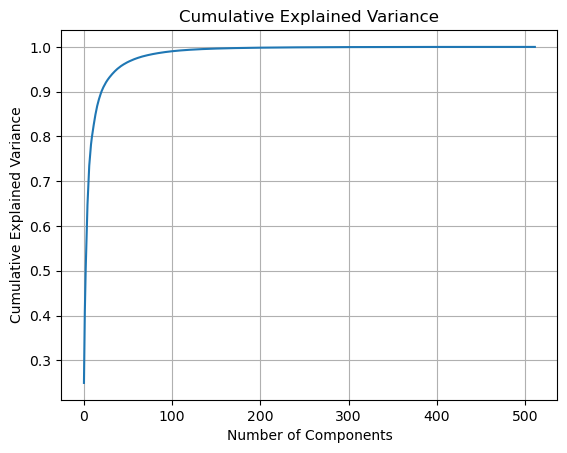

In [51]:
explained_variance_ratio = eigenvalues/np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [53]:
k = 100
components = eigenvectors[:, :k]

In [55]:
#Project the data onto the principal components
compressed_data = np.dot(centered_data, components)

In [57]:
#Reconstruct the image from the compressed data
decompressed_data = np.dot(compressed_data, components.T) + mean

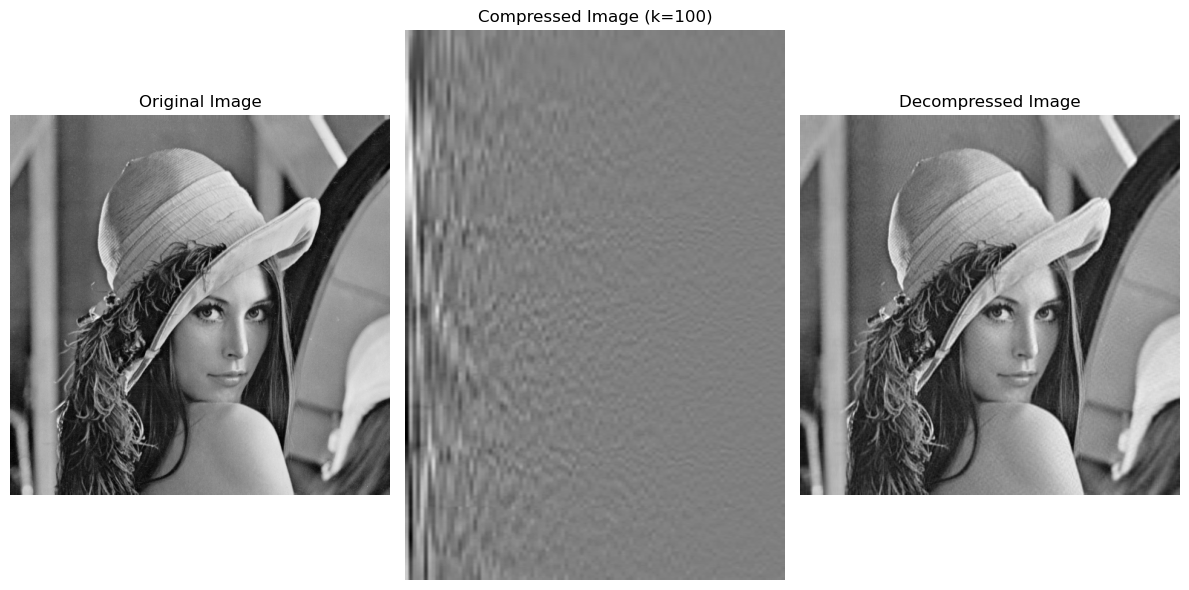

In [63]:
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

#Compressed Representation
plt.subplot(1, 3, 2)
plt.imshow(compressed_data, cmap="gray", aspect="auto")
plt.title(f"Compressed Image (k={k})")
plt.axis("off")

#Decomporessed Image
plt.subplot(1, 3, 3)
plt.imshow(decompressed_data, cmap="gray")
plt.title("Decompressed Image")
plt.axis("off")
plt.tight_layout()
plt.show()